In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("ggplot");

In [2]:
time_step = reader.fetch_data_from_h5("/home/thur0011/GYSELA/simulations_raw/GG2019/delta_zero/q1.5/sp0/Phi2D/Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "/home/thur0011/GYSELA/simulations_raw/GG2019/delta_zero/q1.5/sp0/Phi2D");

/home/thur0011/GYSELA/custom_scripts/python/Scripts/h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
/home/thur0011/GYSELA/custom_scripts/python/Scripts/h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
/home/thur0011/GYSELA/custom_scripts/python/Scripts/h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
/home/thur0011/GYSELA/custom_scripts/python/Scripts/h5_reader_xr.py:18: UserWarning: The 'p

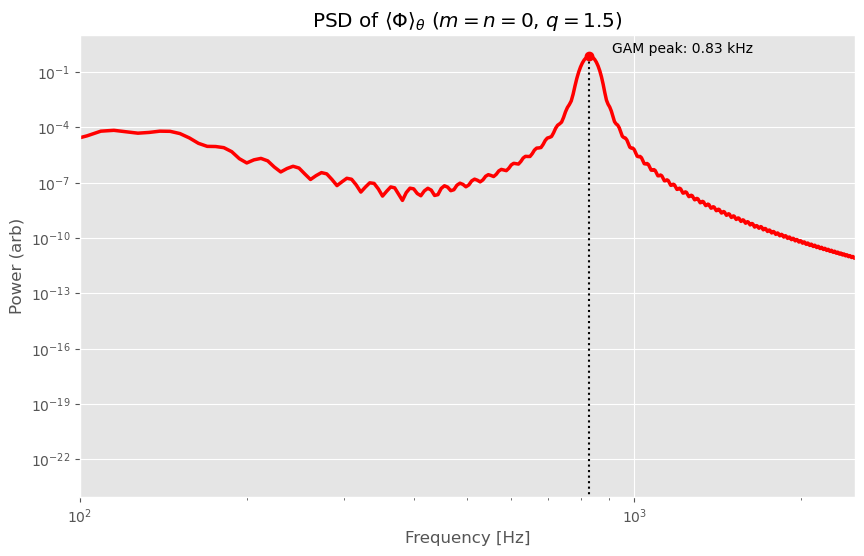

In [ ]:
def plot_power_spectrum_density(phi2D_list):

	# Signal isolation and data processing.
	# Logic here is similar to that of `extract_GAM_frequency` in the utilities.
	radial_time_series = utils.generate_poloidally_averaged_time_series(phi2D_list);
	frequencies, power_spectrum_density = utils.map_power_spectrum(radial_time_series, 40, time_step.flatten()[0]);
	frequencies = utils.convert_to_real_frequency(frequencies)/(2 * np.pi);
	GAM_peak_index = utils.isolate_GAM_peak_index(power_spectrum_density);
	GAM_frequency = frequencies[GAM_peak_index];
	GAM_power = float(power_spectrum_density[GAM_peak_index]);
	
	# Figure plotting logic.
	plt.figure(figsize = (10, 6));
	plt.loglog(frequencies, power_spectrum_density, label = "PSD", color = "red", lw = 2.5);
	plt.vlines(GAM_frequency, GAM_power, 0, colors = "black", linestyles = "dotted");
	plt.plot(GAM_frequency, power_spectrum_density[GAM_peak_index], "ro");
	plt.annotate(f"GAM peak: {GAM_frequency/1e3:.2f} kHz",
				xy = (GAM_frequency, GAM_power),
				xytext = (GAM_frequency * 1.1, GAM_power * 1.5));
	plt.xlim(100, 2500);
	plt.xlabel("Frequency [Hz]");	
	plt.ylabel("Power (arb)");
	plt.title(r"PSD of $\langle \Phi \rangle_\theta$ ($m = n = 0$, $q = 1.5$)");
	plt.show();

plot_power_spectrum_density(data_arrays);

#### NB: the high-frequency ringing after the GAM peak appears to be some sort of spectral leakage artefact, made more prominent by zero-padding.